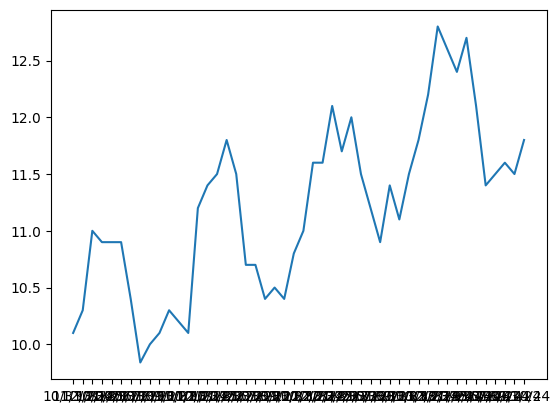

C:\Users\HP\AppData\Local\Temp\ipykernel_16220\1019206503.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])


57    12.85
Name: Prices, dtype: float64


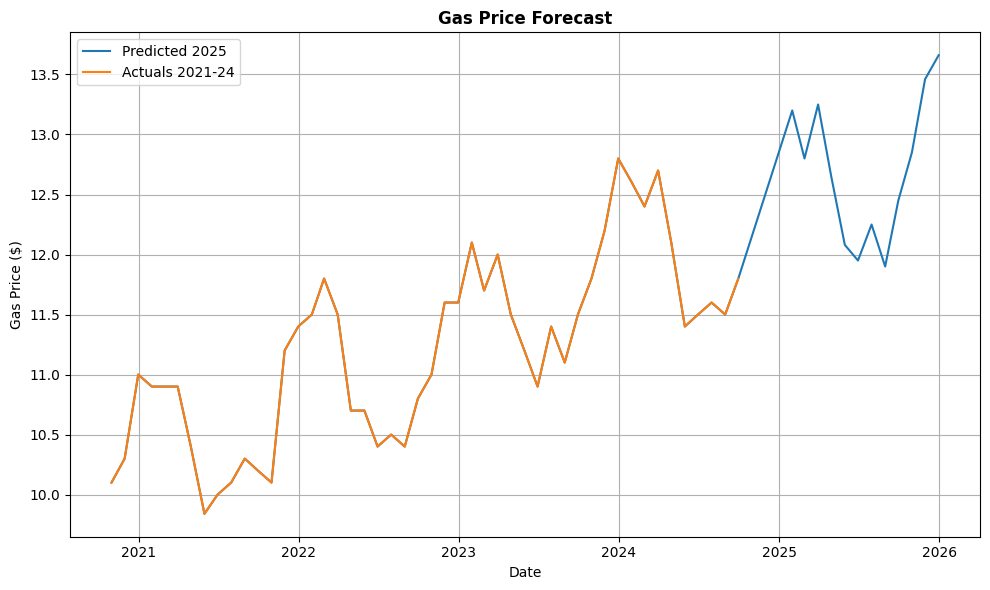

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

natgas_df = pd.read_csv("C:/Users/HP/Desktop/J P Morgan/Nat_Gas.csv")

natgas_df

plt.plot(natgas_df["Dates"], natgas_df["Prices"])
plt.show()

#converting type of dates column 
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])
natgas_df['Year'] = natgas_df['Dates'].dt.year
natgas_df['Month'] = natgas_df['Dates'].dt.month

# Getting data only for january month
natgas_jan = natgas_df[natgas_df['Month'] == 1]
natgas_jan

#pip install scikit-learn

from sklearn.linear_model import LinearRegression

x = np.array(natgas_df[natgas_df['Month'] == 1]['Year']).reshape(-1,1)
y = np.array(natgas_df[natgas_df['Month'] == 1]['Prices'])

reg = LinearRegression().fit(x,y)
reg

round(float(reg.predict([[2025]])[0]),2)

# extrapolation for an extra year

from sklearn.linear_model import LinearRegression

def next_year_price(next_year):
    """ Returns a prediced naturalgas proces for each month in the following year"""

    price_list = []
    for i in np.arange(12):
        x = np.array(natgas_df[natgas_df['Month'] == 1+i]['Year']).reshape(-1,1)
        y = np.array(natgas_df[natgas_df['Month'] == 1+i]['Prices'])
        reg = LinearRegression().fit(x,y)
        price = reg.predict([[next_year]])[0]
        price_list.append(round(float(price),2))
    

    return price_list

ngas_price25 = next_year_price(2025)
np.array(ngas_price25)

from datetime import datetime, timedelta

def get_last_of_each_month(year):
    dates_array = []
    current_date = datetime(year, 12, 31)  # Start from the last day of the year
    while current_date.year == year:
        dates_array.append(current_date.strftime('%Y-%m-%d'))

        # Move to the first day of the current month, then subtract 1 day to go to the previous month's end
        current_date = current_date.replace(day=1) - timedelta(days=1)
    
    return list(reversed(dates_array))  # Optional: return in Jan to Dec order

dates_2025 = get_last_of_each_month(2025)
dates_2025

project_gas_price_25 = pd.DataFrame({'Dates':dates_2025, 'Prices': ngas_price25})
project_gas_price_25

project_gas_price_25['Dates'] = pd.to_datetime(project_gas_price_25['Dates'])

project_gas_price_25['Year'] = project_gas_price_25['Dates'].dt.year
project_gas_price_25['Month'] = project_gas_price_25['Dates'].dt.month
project_gas_price_25

gas_df = pd.concat([natgas_df, project_gas_price_25], ignore_index=True)
gas_df

def get_gas_price(month, year):
    filtered = gas_df[(gas_df['Year'] == year) & (gas_df['Month'] == month)]
    print(filtered['Prices'])

get_gas_price(10,2025)

# Make sure Dates are in datetime format
gas_df['Dates'] = pd.to_datetime(gas_df['Dates'])
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(gas_df['Dates'], gas_df['Prices'], label='Predicted 2025')
plt.plot(natgas_df['Dates'], natgas_df['Prices'], label='Actuals 2021-24')

# Labels and formatting
plt.ylabel('Gas Price ($)')
plt.xlabel('Date')
plt.title('Gas Price Forecast', fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()